In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
### pip install citipy

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [4]:
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it's being processed (with the city number and city name).

In [4]:
# Url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
# List for holding reponse information

city_data = []

# Loop through the list of cities and request for data on each
print("Beginning Data Retrieval")
print("-----------------------------")

record_count = 0
set_count = 1
          
# Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.

for i, city in enumerate(cities):
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
  
    city_url = url + "&q=" + city
   
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
 
    record_count += 1
    
    try:
        response = requests.get(query_url + city).json()
        
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']  
        city_maxtemp = response['main']['temp_max']
        city_humd = response['main']['humidity']
        city_cloud = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        city_data.append({'City': city,
                           'Lat': city_lat,
                           'Lng': city_lng,
                      'Max Temp': city_maxtemp,
                      'Humidity': city_humd,
                    'Cloudiness': city_cloud,
                    'Wind Speed': city_wind,
                       'Country': city_country,
                          'Date': city_date
                             })               

    except KeyError:
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | meyungs
City not found. Skipping...
Processing Record 1 of Set 1 | hirado
Processing Record 2 of Set 1 | rawson
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | tasiilaq
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | paamiut
Processing Record 7 of Set 1 | norman wells
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | luganville
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | huejuquilla el alto
Processing Record 13 of Set 1 | kuzovatovo
Processing Record 14 of Set 1 | alofi
Processing Record 15 of Set 1 | worcester
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | omboue
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | berbera
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | alice sprin

Processing Record 37 of Set 4 | rawannawi
City not found. Skipping...
Processing Record 38 of Set 4 | ixtapa
Processing Record 39 of Set 4 | georgetown
Processing Record 40 of Set 4 | hot springs
Processing Record 41 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 42 of Set 4 | kalmunai
Processing Record 43 of Set 4 | andselv
City not found. Skipping...
Processing Record 44 of Set 4 | bure
Processing Record 45 of Set 4 | eydhafushi
Processing Record 46 of Set 4 | makubetsu
Processing Record 47 of Set 4 | itaituba
Processing Record 48 of Set 4 | aripuana
Processing Record 49 of Set 4 | ostrovnoy
Processing Record 0 of Set 5 | srednekolymsk
Processing Record 1 of Set 5 | sakaraha
Processing Record 2 of Set 5 | karkaralinsk
City not found. Skipping...
Processing Record 3 of Set 5 | samarai
Processing Record 4 of Set 5 | ippy
Processing Record 5 of Set 5 | westport
Processing Record 6 of Set 5 | zabol
Processing Record 7 of Set 5 | tezu
Processing Record 8 o

Processing Record 23 of Set 8 | alibag
Processing Record 24 of Set 8 | comodoro rivadavia
Processing Record 25 of Set 8 | stornoway
Processing Record 26 of Set 8 | marathon
Processing Record 27 of Set 8 | broken hill
Processing Record 28 of Set 8 | poum
Processing Record 29 of Set 8 | mehamn
Processing Record 30 of Set 8 | port keats
Processing Record 31 of Set 8 | amalapuram
Processing Record 32 of Set 8 | zarubino
Processing Record 33 of Set 8 | byron bay
Processing Record 34 of Set 8 | constantine
Processing Record 35 of Set 8 | phan rang
City not found. Skipping...
Processing Record 36 of Set 8 | akyab
Processing Record 37 of Set 8 | brae
Processing Record 38 of Set 8 | ihosy
Processing Record 39 of Set 8 | jinchengjiang
City not found. Skipping...
Processing Record 40 of Set 8 | sao lourenco do sul
Processing Record 41 of Set 8 | trairi
Processing Record 42 of Set 8 | el paraiso
Processing Record 43 of Set 8 | holbeach
Processing Record 44 of Set 8 | mezen
Processing Record 45 of 

City not found. Skipping...
Processing Record 12 of Set 12 | borgarnes
Processing Record 13 of Set 12 | kapit
Processing Record 14 of Set 12 | luanda
Processing Record 15 of Set 12 | starobachaty
Processing Record 16 of Set 12 | aykhal
Processing Record 17 of Set 12 | henties bay
Processing Record 18 of Set 12 | kropotkin
Processing Record 19 of Set 12 | tres picos
Processing Record 20 of Set 12 | muncar
Processing Record 21 of Set 12 | kerema
Processing Record 22 of Set 12 | la palma
Processing Record 23 of Set 12 | khandyga
Processing Record 24 of Set 12 | kichmengskiy gorodok
Processing Record 25 of Set 12 | manicore
Processing Record 26 of Set 12 | santa marta
Processing Record 27 of Set 12 | maracaju
Processing Record 28 of Set 12 | diamantino
Processing Record 29 of Set 12 | narrabri
Processing Record 30 of Set 12 | kuche
City not found. Skipping...
Processing Record 31 of Set 12 | swan river
Processing Record 32 of Set 12 | bafq
Processing Record 33 of Set 12 | akdepe
Processing

In [6]:
# Convert raw data to dataframe.
city_weather_df = pd.DataFrame(city_data)

# Drop any cities that were skipped.
city_weather_df = city_weather_df.dropna(how="any")
print(city_weather_df.count())

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64


In [7]:
# Export the city data into a .csv.
city_weather_df.to_csv("output_data/city_weather_data.csv", index=False)

# Display the DataFrame
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hirado,33.3597,129.5531,75.20,35,0,4.61,JP,1617257768
1,rawson,-43.3002,-65.1023,59.16,87,100,7.20,AR,1617257769
2,cape town,-33.9258,18.4232,64.00,72,20,14.97,ZA,1617257553
3,tasiilaq,65.6145,-37.6368,26.60,54,40,4.61,GL,1617257769
4,mar del plata,-38.0023,-57.5575,66.00,100,96,6.31,AR,1617257736


In [8]:
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,20.079545,15.493785,57.486354,70.453097,56.102655,7.915770,1.617258e+09
std,33.001924,90.929402,24.606439,22.261662,38.991908,5.803072,9.693873e+01
min,-54.800000,-175.200000,-16.870000,1.000000,0.000000,0.220000,1.617257e+09
25%,-7.608700,-63.598600,41.000000,61.000000,16.000000,3.440000,1.617258e+09
50%,22.600000,21.185900,62.600000,75.000000,73.000000,6.670000,1.617258e+09
75%,48.755500,95.321400,76.840000,87.000000,92.000000,11.180000,1.617258e+09
max,78.218600,179.316700,102.310000,100.000000,100.000000,54.090000,1.617258e+09


In [9]:
# Get index of the rows where humidity > 100%
dirty_cities = city_weather_df[city_weather_df["Humidity"] > 100].index
dirty_cities

Int64Index([], dtype='int64')

In [10]:
weather_df = city_weather_df.drop(dirty_cities, inplace=False)

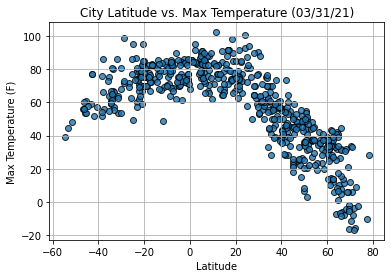

In [11]:
# Latitude vs. Temperature Plot

x_values = weather_df['Lat']
y_values = weather_df['Max Temp']

plt.scatter(x_values, y_values, alpha = 0.80, edgecolors = "black", linewidths = 1)

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))

plt.grid()
plt.savefig("./output_data/lat_vs_temp.png")
plt.show()

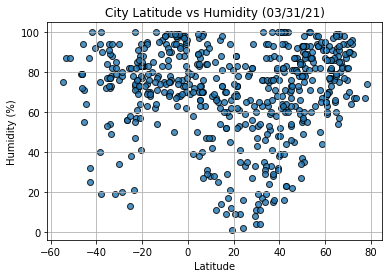

In [12]:
# Latitude vs. Humidity Plot

x_values = weather_df['Lat']
y_values = weather_df['Humidity']

plt.scatter(x_values, y_values, alpha = 0.80, edgecolors = "black", linewidths = 1)

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs Humidity (%s)" % time.strftime("%x"))

plt.grid()
plt.savefig("./output_data/lat_vs_hum.png")
plt.show()

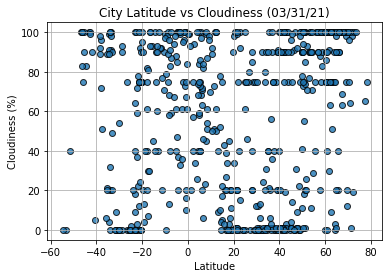

In [13]:
# Latitude vs. Cloudiness Plot

x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']

plt.scatter(x_values, y_values, alpha = 0.80, edgecolors = "black", linewidths = 1)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs Cloudiness (%s)" % time.strftime("%x"))

plt.grid()
plt.savefig("./output_data/lat_vs_cloud.png")
plt.show()

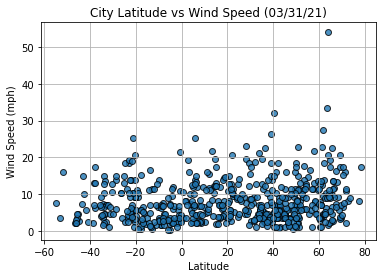

In [14]:
# Latitude vs. Wind Speed Plot

x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']

plt.scatter(x_values, y_values, alpha = 0.80, edgecolors = "black", linewidths = 1)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs Wind Speed (%s)" % time.strftime("%x"))

plt.grid()
plt.savefig("./output_data/lat_vs_wind.png")
plt.show()

In [29]:
import scipy.stats as st

#Create a function to create Linear Regression plots

def Linear_Regression_Plot(x_values, y_values, x_label, y_label, hemisphere, line_text):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values, y_values, alpha = 0.80, edgecolors = "black", linewidths = 1)
    plt.plot(x_values, regress_values, color='r')
    plt.annotate(line_eq, line_text)
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label}")
    
    # Print r value
    print(f"The r-value is: {rvalue}")

In [16]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemisphere_weather_df = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere_weather_df = weather_df.loc[weather_df["Lat"] < 0]

The r-value is: -0.8802268225251881


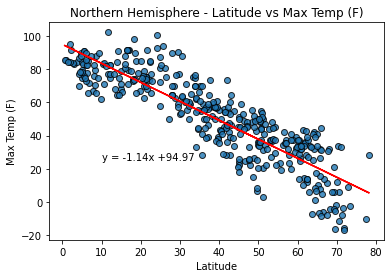

In [113]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Max Temp']

Linear_Regression_Plot(x_values, y_values, "Latitude", "Max Temp (F)", "Northern",(10, 25))

plt.savefig("./output_data/north_temp_vs_lat.png")
plt.show()

The r-value is: 0.5421320529586331


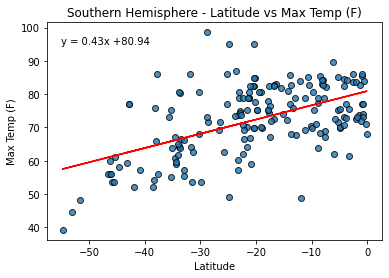

In [112]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Max Temp']

Linear_Regression_Plot(x_values, y_values, "Latitude", "Max Temp (F)", "Southern",(-55, 95))

plt.savefig("./output_data/south_temp_vs_lat.png")
plt.show()

The r-value is: 0.303324550164792


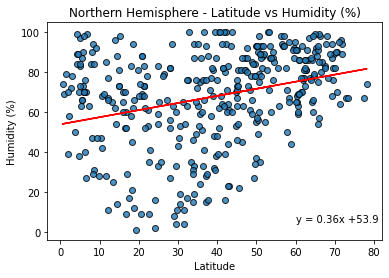

In [132]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Humidity']

Linear_Regression_Plot(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(60, 5))

plt.savefig("./output_data/north_humidity_vs_lat.png")
plt.show()

The r-value is: 0.2446106718295048


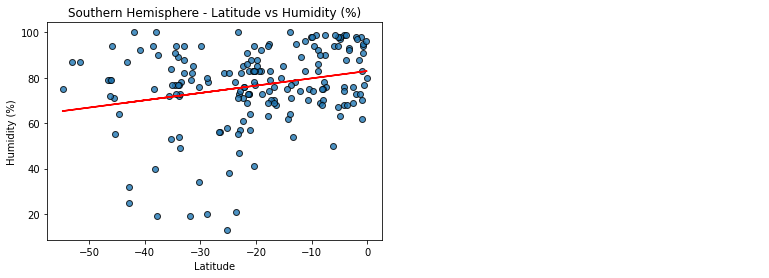

In [133]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Humidity']

Linear_Regression_Plot(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(55, 55))

plt.savefig("./output_data/south_humidity_vs_lat.png")
plt.show()

The r-value is: 0.2325806551173851


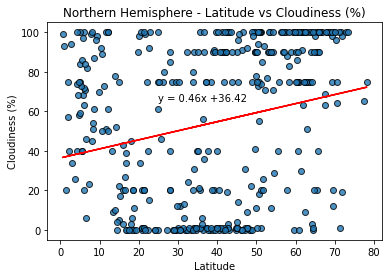

In [89]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Cloudiness']

Linear_Regression_Plot(x_values, y_values, "Latitude", "Cloudiness (%)", "Northern",(25, 65))

plt.savefig("./output_data/north_cloud_vs_lat.png")
plt.show()

The r-value is: 0.1424257613475132


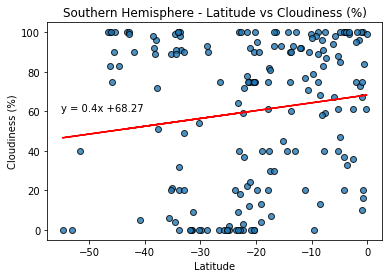

In [75]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Cloudiness']

Linear_Regression_Plot(x_values, y_values, "Latitude", "Cloudiness (%)", "Southern",(-55, 60))

plt.savefig("./output_data/south_cloud_vs_lat.png")
plt.show()

The r-value is: 0.08628574915452346


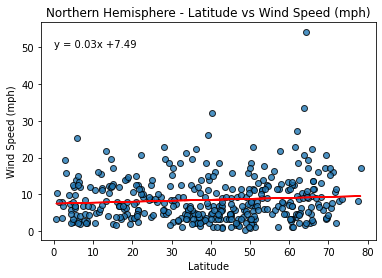

In [131]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Wind Speed']

Linear_Regression_Plot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(0, 50))

plt.savefig("./output_data/north_wind_vs_lat.png")
plt.show()

The r-value is: -0.1667238709627101


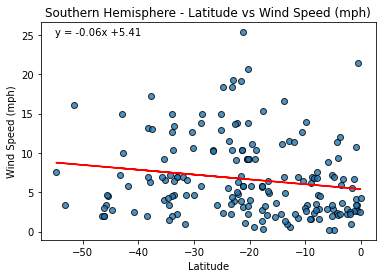

In [41]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Wind Speed']

Linear_Regression_Plot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-55, 25))

plt.savefig("./output_data/south_wind_vs_lat.png")
plt.show()

#For Part I, you must include a written description of three observable trends based on the data.

1) The humidity of northen hemisphere is very scattered meaning that there is no particular trend while in the southern hemisphere the humidity is close to the 60 - 100 range. 
2) The cloudiness of each city is very scattered meaning that there is no particular trend in either the northern or southern hemisphere.
3) The wind speed appears to be constant in the northern hemisphere where it is very low speed versus the southern hemisphere where the wind speed is low but scattered with some outliers. 